# Sentiment Analysis from IMDB Reviews

Aim: Sentiment Analysis of Text using a Neural Network (in Keras).

reference: https://keras.io/api/datasets/

note: if using Anaconda, first check if Tensorflow is installed. Also switch to the correct environment.

> conda list

if installation is required:

> conda install tensorflow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.python import keras

In [3]:
from keras.datasets import imdb # load the IMDB reviews dataset
#(x_train, y_train), (x_test, y_test) = imdb.load_data() 


top_words = 10000 # alternate code
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

#This dataset is used for binary classification of reviews i.e, positive or negative. 
#It consists of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 

Using TensorFlow backend.
E:\Anaconda3\envs\TensorFlow-py35\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
E:\Anaconda3\envs\TensorFlow-py35\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
imdb.get_word_index() # get a preview of the word dictionary

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

The dataset is encoded as a collection of integers rather than words. 

In [5]:
# To see the first review in "x_train" in text:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Notice the missing punctuation. This is because we reconstituted the text from the integers in the array for the first review.
Any missing words will show as "?".

Next, To train a neural network with collection of tensors, each tensor needs to be the same length. At present, the lists representing reviews in x_train and x_test have varying lengths.

In [6]:
from keras.preprocessing import sequence
max_review_length = 500

# pad forces all the lists representing movie reviews in x_train and x_test to a length of 500 integers.
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

# Build a model using a Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


Above is a neural network as a stack of layers in which the output from one layer provides input to the next, i.e. a "Sequential" model.

First is an embedding layer, which maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. It also allows words with similar meanings to be treated alike.

The next three layers are dense layers, also known as fully connected layers. Each layer contains n nodes or neurons (here n=16), and each neuron receives input from every neuron in the previous layer, hence the term "fully connected." It is these layers that permit a neural network to "learn" from input data by iteratively guessing at the output, checking the results, and fine-tuning the connections to produce better results. The final dense layer contains just one neuron because the ultimate goal of the network is to predict one output — namely, a sentiment score from 0.0 to 1.0.

The compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step.

In [8]:
# Now call the fit function to train the neural network:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

E:\Anaconda3\envs\TensorFlow-py35\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 144us/step - loss: 0.5458 - accuracy: 0.6875 - val_loss: 0.3011 - val_accuracy: 0.8729
Epoch 2/5
25000/25000 [==============================] - 3s 136us/step - loss: 0.1949 - accuracy: 0.9249 - val_loss: 0.3100 - val_accuracy: 0.8702
Epoch 3/5
25000/25000 [==============================] - 3s 137us/step - loss: 0.0683 - accuracy: 0.9809 - val_loss: 0.3453 - val_accuracy: 0.8728
Epoch 4/5
25000/25000 [==============================] - 3s 136us/step - loss: 0.0151 - accuracy: 0.9976 - val_loss: 0.4295 - val_accuracy: 0.8695
Epoch 5/5
25000/25000 [==============================] - 3s 134us/step - loss: 0.0029 - accuracy: 0.9998 - val_loss: 0.4911 - val_accuracy: 0.8684


[]

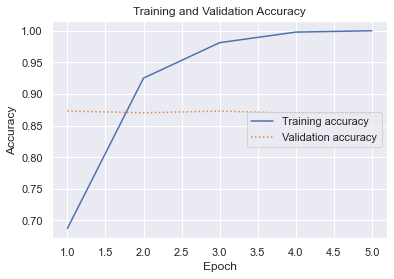

In [9]:
# visualize the changes in training and validation accuracy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.plot()

Plot shows a plateauing after 4 epochs. So we can reduce the number of epochs.

[]

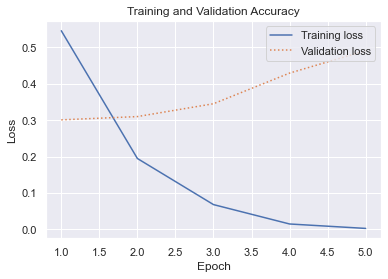

In [10]:
# Another way to check for overfitting is to compare training loss to validation loss as training proceeds:

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.plot()

In [11]:
# Evaluate the model:
#to determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test and y_test:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.84%


# Test the model with new text
To write a Python function that accepts a text string as input, passes it to the model, and returns a sentiment score.

In [12]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result to make a prediction on new data:
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [13]:
analyze('Easily the most stellar experience I have ever had.')

0.9322143

In [14]:
analyze('The long lines and poor customer service really made me sad.')

0.0059662755

reference: Microsoft learn